In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../qdmt/')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from tqdm import tqdm

In [4]:
from uMPSHelpers import *

Want to implement the time evolution. 

- [x] Prepare the ground state 
- [x] Evolve state 
- [ ] Optimise overlap between evolved state and reference state 
- [ ] Loop for n time steps

### Preparing ground state

In [5]:
from hamiltonian import TransverseIsing
import vumps as v

In [6]:
N = 2
D, d = 4, 2
A0 = createMPS(D, d)
A0 = normalizeMPS(A0)

In [7]:
g_range = np.linspace(0.1, 2.0, 20)

In [8]:
energies = []
Als = []
for g in tqdm(g_range): 
    h = TransverseIsing(1, g, N)
    hten = v.tensorOperator(h)

    Al, Ac, Ar, C = v.vumps(hten, D, d, A0=A0, tol=1e-8, tolFactor=1e-2, verbose=False)
    
    energies.append(v.expValNMixed(hten, Ac, Ar))
    Als.append(Al)

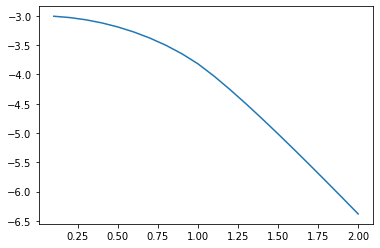

In [9]:
plt.plot(g_range, np.real(energies))

In [10]:
## Starting with the g=0.2 groundstate 
i = 1
print(g_range[i])
AInit = Als[i]

0.2


### Evolving States

In [11]:
import evolve as e

In [27]:
g2 = 1.5
dtau=0.1
h2 = TransverseIsing(1, g, 2)
U2 = la.expm(-1j*h2*dtau)

In [28]:
N = 4
rhodt = e.firstOrderTrotterEvolve(AInit, U2, U2, N)

In [29]:
rhodt.shape

(2, 2, 2, 2, 2, 2, 2, 2)

### Optimising overlap between evolved state and reference state

In [30]:
import optimise as o

In [35]:
A0 = np.copy(AInit)
D = 8

In [36]:
E1, At = o.optimiseDensityGradDescent(rhodt, D, eps=1e-1, A0=A0, tol=1e-5, maxIter=1e3)

iteration:	50	dist:	0.000857446676	gradient norm:	1.2836e-01
iteration:	100	dist:	0.000101338566	gradient norm:	7.7190e-03
iteration:	150	dist:	0.000098598000	gradient norm:	5.7692e-04
iteration:	200	dist:	0.000098528692	gradient norm:	4.6223e-04
iteration:	250	dist:	0.000098464054	gradient norm:	4.5805e-04
iteration:	300	dist:	0.000098400269	gradient norm:	4.5414e-04
iteration:	350	dist:	0.000098337356	gradient norm:	4.5030e-04
iteration:	400	dist:	0.000098275295	gradient norm:	4.4654e-04
iteration:	450	dist:	0.000098214070	gradient norm:	4.4285e-04
iteration:	500	dist:	0.000098153662	gradient norm:	4.3924e-04
iteration:	550	dist:	0.000098094055	gradient norm:	4.3570e-04
iteration:	600	dist:	0.000098035232	gradient norm:	4.3222e-04
iteration:	650	dist:	0.000097977177	gradient norm:	4.2881e-04
iteration:	700	dist:	0.000097919874	gradient norm:	4.2547e-04
iteration:	750	dist:	0.000097863308	gradient norm:	4.2219e-04
iteration:	800	dist:	0.000097807465	gradient norm:	4.1896e-04
iteration

iteration:	6600	dist:	0.000093969160	gradient norm:	2.4056e-04
iteration:	6650	dist:	0.000093949499	gradient norm:	2.3975e-04
iteration:	6700	dist:	0.000093929996	gradient norm:	2.3896e-04
iteration:	6750	dist:	0.000093910649	gradient norm:	2.3817e-04
iteration:	6800	dist:	0.000093891455	gradient norm:	2.3739e-04
iteration:	6850	dist:	0.000093872412	gradient norm:	2.3662e-04
iteration:	6900	dist:	0.000093853520	gradient norm:	2.3586e-04
iteration:	6950	dist:	0.000093834775	gradient norm:	2.3510e-04
iteration:	7000	dist:	0.000093816178	gradient norm:	2.3435e-04
iteration:	7050	dist:	0.000093797724	gradient norm:	2.3361e-04
iteration:	7100	dist:	0.000093779414	gradient norm:	2.3287e-04
iteration:	7150	dist:	0.000093761245	gradient norm:	2.3214e-04
iteration:	7200	dist:	0.000093743215	gradient norm:	2.3142e-04
iteration:	7250	dist:	0.000093725323	gradient norm:	2.3071e-04
iteration:	7300	dist:	0.000093707568	gradient norm:	2.3000e-04
iteration:	7350	dist:	0.000093689947	gradient norm:	2.2